## **KLASIFIKASI DATA TIDAK SEIMBANG**

In [1]:
import pandas as pd

In [2]:
# memuat dataset
data = pd.read_csv("datauji.csv")

print(data.head())

   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steer

In [3]:
# info dataset untuk melihat informasi kolom dan tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [4]:
# mengecek jumlah nilai null dalam dataset
data.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

Kumpulan data berisi 58.592 entri dan 41 kolom, termasuk variabel target claim_status. Kumpulan data ini didasarkan pada masalah prediksi frekuensi klaim asuransi. Berikut ini ikhtisar singkat beberapa fiturnya:

1. policy_id: Pengidentifikasi unik untuk polis asuransi
2. subscription_length, vehicle_age, customer_age: Atribut numerik yang terkait dengan kebijakan, kendaraan, dan pelanggan
3. kode_wilayah, segmen, model, tipe_bahan bakar: Atribut kategorikal yang mewakili wilayah, segmen kendaraan, model, dan jenis bahan bakar
4. max_torque, max_power, engine_type: Spesifikasi mesin kendaraan
5. airbag, is_esc, is_adjustable_steering: Fitur yang berhubungan dengan keselamatan dan kenyamanan kendaraan
6. claim_status: Variabel target yang menunjukkan apakah klaim dibuat (1) atau tidak (0)

Selanjutnya, saya akan melakukan analisis data eksploratif untuk memvisualisasikan dan memahami distribusi, hubungan, dan pola dalam data. Analisis ini akan mencakup pemeriksaan distribusi variabel target dan fitur-fitur utama. 

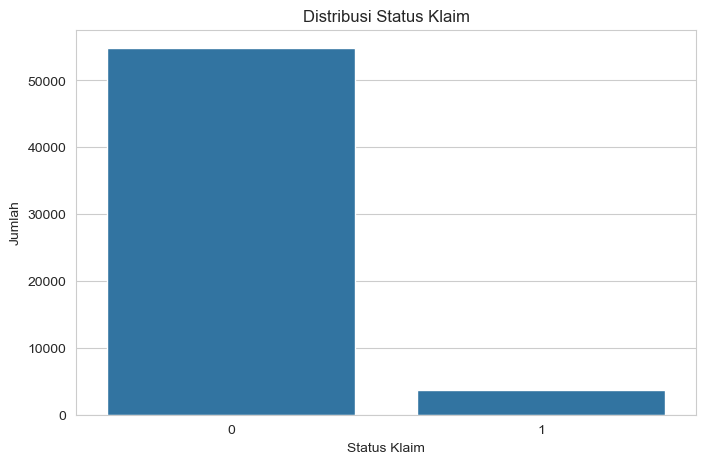

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# plot distribusi variabel target 'claim_status'
plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=data)
plt.title('Distribusi Status Klaim')
plt.xlabel('Status Klaim')
plt.ylabel('Jumlah')
plt.show()

Distribusi claim_status menunjukkan ketidakseimbangan yang signifikan antara kelas-kelas, dengan jumlah klaim yang jauh lebih sedikit (1) dibandingkan dengan tidak ada klaim (0). Ketidakseimbangan ini akan menjadi tantangan untuk diatasi selama fase pelatihan model guna memastikan model kita tidak menjadi bias terhadap prediksi kelas mayoritas.

Selanjutnya, saya akan melakukan analisis terhadap fitur numerik dan kategoris untuk memahami distribusi dan hubungannya dengan claim_status:

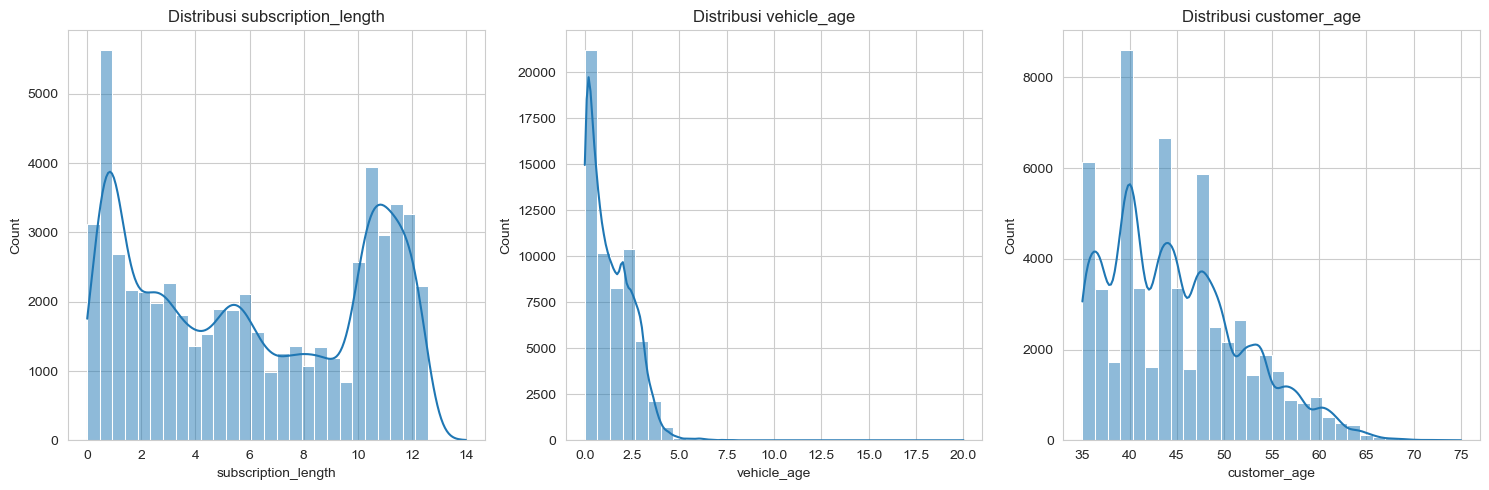

In [6]:
# memilih kolom-kolom numerik untuk dianalisis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# plotting distribusi fitur numerik
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

Distribusi fitur numerik subscription_length, vehicle_age, dan customer_age menunjukkan karakteristik berikut:

1. panjang_langganan: Sebagian besar nilai dikelompokkan di sekitar angka yang lebih rendah, yang menunjukkan bahwa banyak kebijakan memiliki jangka waktu berlangganan yang lebih pendek.
2. vehicle_age: Distribusi ini agak seragam tetapi dengan lonjakan pada usia tertentu, mungkin mewakili interval usia kendaraan umum dalam kumpulan data.
3. customer_age: Ini menunjukkan distribusi yang cukup normal, dengan mayoritas pelanggan berada dalam rentang usia paruh baya.

Selanjutnya, saya akan menganalisis fitur kategorikal yang relevan untuk memahami variasi dan hubungannya dengan status_klaim. Saya akan fokus pada fitur seperti region_code, segment, danfuel_type:

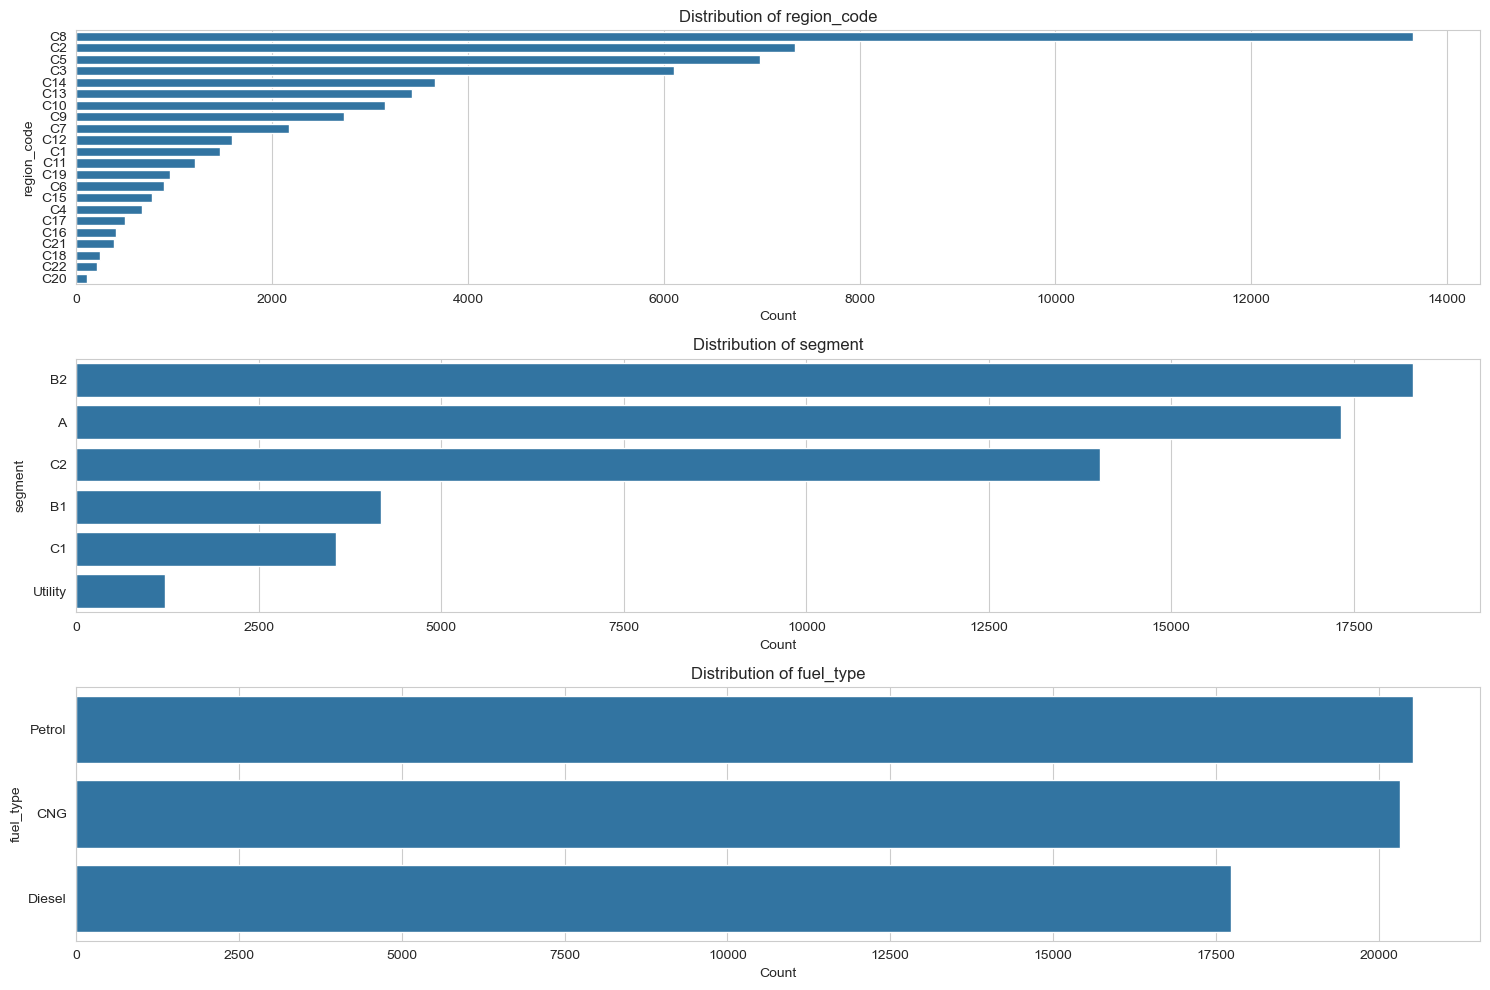

In [8]:
# memilih beberapa kolom kategori yang relevan untuk dianalisis
categorical_columns = ['region_code', 'segment', 'fuel_type']

# merencanakan distribusi fitur kategorikal
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order = data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Untuk 'region_code,' terdapat berbagai macam kode, masing-masing dengan jumlah yang bervariasi, tetapi beberapa kode tertentu mendominasi dengan jumlah yang jauh lebih tinggi daripada yang lain. Dalam distribusi 'segmen', terdapat lebih sedikit kategori, dengan segmen 'B2' menjadi yang paling umum, diikuti oleh 'A' dan 'C2,' dan segmen 'Utilitas' menjadi yang paling jarang. Terakhir, 'fuel_type' menunjukkan tiga kategori: 'Bensin' memiliki jumlah tertinggi daripada CNG dan Diesel.

## Menangani Ketidakseimbangan Kelas
Langkah selanjutnya adalah menyeimbangkan kumpulan data menggunakan oversampling untuk menangani ketidakseimbangan kelas yang diamati di status_klaim:

In [9]:
from sklearn.utils import resample

# memisahkan kelas mayoritas dan minoritas
majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

# oversampling untuk kelas minoritas
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)

# menggabungkan kelas mayoritas dengan kelas minoritas yang di-oversample
oversampled_data = pd.concat([majority, minority_oversampled])

# memeriksa distribusi dataset yang di-oversample
oversampled_distribution = oversampled_data.claim_status.value_counts()

oversampled_distribution

claim_status
0    54844
1    54844
Name: count, dtype: int64

Setelah melakukan oversampling pada kelas minoritas, kedua kelas tersebut seimbang dengan masing-masing 54.844 entri. Sekarang, dapat di lihat beberapa variabel kunci untuk melihat seperti apa data yang seimbang:

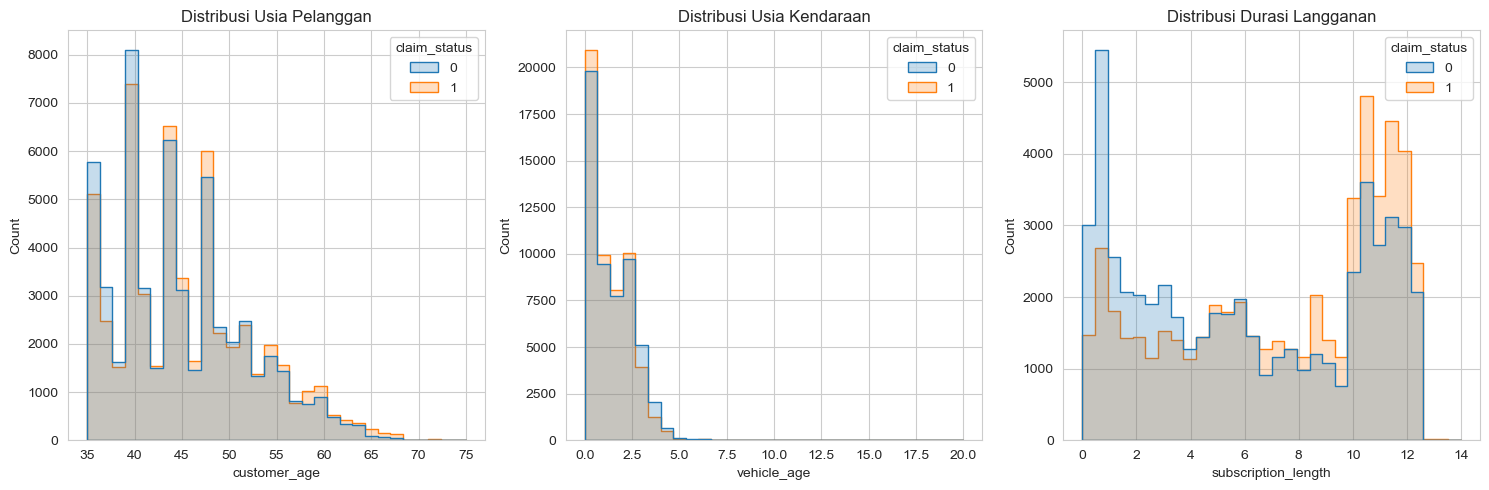

In [10]:
# menggabungkan kelas mayoritas dengan kelas minoritas yang di-oversample
oversampled_data = pd.concat([majority, minority_oversampled])

# memeriksa distribusi dataset yang di-oversample
oversampled_distribution = oversampled_data.claim_status.value_counts()

oversampled_distribution

# plotting distribusi 'customer_age', 'vehicle_age', dan 'subscription_length' berdasarkan 'claim_status'
plt.figure(figsize=(15, 5))

# distribusi 'customer_age'
plt.subplot(1, 3, 1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title('Distribusi Usia Pelanggan')

# distribusi 'vehicle_age'
plt.subplot(1, 3, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title('Distribusi Usia Kendaraan')

# distribusi 'subscription_length'
plt.subplot(1, 3, 3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Distribusi Durasi Langganan')

plt.tight_layout()
plt.show()


Data yang diambil sampelnya secara berlebihan memang terlihat seperti data asli.

## Pemilihan Fitur
Sekarang, saya akan mengidentifikasi variabel terpenting untuk memprediksi frekuensi klaim asuransi. Ini melibatkan analisis fitur kategoris dan numerik untuk menentukan dampaknya terhadap variabel target. Saya akan menggunakan teknik kepentingan fitur yang cocok untuk kedua jenis variabel. Mari kita mulai dengan pemilihan fitur untuk mengidentifikasi variabel yang paling penting:

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# melakukan encoding variabel kategorikal
le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# memisahkan fitur dan variabel target
X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

# membuat model klasifikasi Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# mendapatkan tingkat kepentingan fitur
feature_importance = rf_model.feature_importances_

# membuat dataframe untuk visualisasi tingkat kepentingan fitur
features_df = pd.DataFrame({'Fitur': X.columns, 'Kepentingan': feature_importance})
features_df = features_df.sort_values(by='Kepentingan', ascending=False)

print(features_df.head(10))  # menampilkan 10 fitur penting teratas

                  Fitur  Kepentingan
0             policy_id     0.321072
1   subscription_length     0.248309
3          customer_age     0.176639
2           vehicle_age     0.135190
5        region_density     0.053838
4           region_code     0.052649
7                 model     0.000957
24               length     0.000846
26         gross_weight     0.000834
11          engine_type     0.000791


10 variabel terpenting untuk memprediksi frekuensi klaim asuransi, menurut model Random Forest, adalah:

1. policy_id: Pengidentifikasi unik untuk polis asuransi
2. subscription_length: Durasi langganan asuransi
3. customer_age: Usia pelanggan
4. vehicle_age: Usia kendaraan
5. region_density: Kepadatan penduduk suatu wilayah
6. region_code: Kode yang mewakili wilayah
7. model: Model kendaraan
8. engine_type: Jenis mesin pada kendaraan
9. gross_weight: Berat kotor kendaraan
10. lenght: Panjang kendaraan

Variabel-variabel ini tampaknya memiliki pengaruh paling besar terhadap kemungkinan pengajuan klaim asuransi. Namun, perlu dicatat bahwa policy_id memiliki kepentingan yang sangat tinggi, yang mungkin tidak relevan secara intuitif untuk prediksi. Jadi, kita perlu memastikan untuk menghilangkan kolom policy_id saat pelatihan model.

## Pelatihan Model

Langkah selanjutnya adalah membangun model prediktif menggunakan data yang diambil sampelnya secara berlebihan. Mengingat sifat tugas (klasifikasi biner), algoritme yang sesuai dapat berupa regresi logistik, random forest, atau gradient boosting. Dengan mempertimbangkan efektivitas random forest dalam menangani data numerik dan kategorikal serta kemampuannya untuk memodelkan interaksi yang kompleks, saya akan melanjutkan dengan pengklasifikasi Random Forest:

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# menghapus kolom 'policy_id' dari data yang di-oversample
oversampled_data = oversampled_data.drop('policy_id', axis=1)

# menyiapkan data yang di-oversample
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

# encoding kolom-kolom kategorikal
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

# membuat dan melatih model Random Forest
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

# prediksi
y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



Laporan klasifikasi di atas menyediakan berbagai metrik untuk mengevaluasi kinerja model prediktif pada data pengujian. Berikut interpretasi hasilnya:


1. Untuk kelas 0 (tidak ada klaim), presisinya adalah 1,00, artinya ketika model memprediksi tidak ada klaim, maka model tersebut 100% benar. Untuk kelas 1 (klaim), presisinya adalah 0,98, yang menunjukkan bahwa ketika model memprediksi suatu klaim, model tersebut 98% benar.
2. Untuk kelas 0, perolehan kembali adalah 0,98, yang menandakan bahwa model tersebut mengidentifikasi dengan benar 98% dari semua kejadian tanpa klaim yang sebenarnya. Untuk kelas 1, perolehan kembali adalah 1,00, yang menunjukkan bahwa model mengidentifikasi 100% dengan benar dari semua contoh klaim aktual.
3. Skor F1 untuk kedua kelas adalah 0,99, menunjukkan keseimbangan yang tinggi antara presisi dan perolehan. Artinya, model tersebut akurat dan andal dalam prediksinya di kedua kelas.
4. Keakuratan model secara keseluruhan adalah 99%, artinya model ini secara tepat memprediksi status klaim untuk 99% kasus pada kumpulan data uji.
5. Rata-rata makro untuk presisi, perolehan kembali, dan skor F1 adalah 0,99, yang mencerminkan kinerja rata-rata model di kedua kelas tanpa mempertimbangkan ketidakseimbangan dalam distribusi kelas. Nilai tinggi ini menunjukkan bahwa model tersebut berkinerja baik di kedua kelas. Rata-rata tertimbang untuk presisi, perolehan kembali, dan skor F1 juga 0,99, dengan mempertimbangkan ketidakseimbangan dalam distribusi kelas. Ini menunjukkan bahwa, secara rata-rata, model tersebut berkinerja baik secara konsisten di berbagai kelas ketika mempertimbangkan distribusinya dalam kumpulan data.

Hasil ini menunjukkan model yang sangat efektif untuk memprediksi klaim asuransi, dengan metrik kinerja yang kuat di kedua jenis hasil. Tingginya penarikan kembali klaim (kelas 1) sangat penting karena hal ini menyiratkan bahwa model tersebut sangat efektif dalam mengidentifikasi kejadian di mana klaim terjadi, yang sering kali menjadi perhatian utama dalam kumpulan data yang tidak seimbang.

Sekarang, saya  memberi label pada data asli yang tidak seimbang menggunakan model yang  sudah dibuat untuk melihat berapa banyak instance yang diklasifikasikan dengan benar dari model saya:

In [13]:
# Encoding data asli dan membuat prediksi menggunakan model yang telah dilatih
original_encoded = data.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

# membandingkan hasil prediksi dengan nilai sebenarnya
comparison_df = pd.DataFrame({
    'Aktual': original_encoded['claim_status'],
    'Prediksi': original_encoded_predictions
})

print(comparison_df.head(10))

   Aktual  Prediksi
0       0         0
1       0         0
2       0         0
3       0         1
4       0         0
5       0         0
6       0         0
7       0         0
8       0         0
9       0         0


Mari kita visualisasikan persentase sampel yang diklasifikasikan dengan benar dan salah diklasifikasikan:

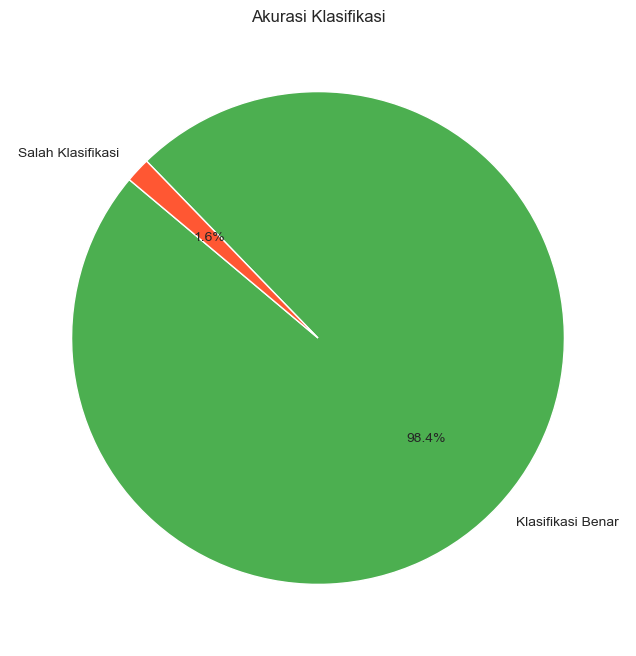

In [15]:
# menghitung jumlah klasifikasi yang benar dan salah
correctly_classified = (comparison_df['Aktual'] == comparison_df['Prediksi']).sum()
incorrectly_classified = (comparison_df['Aktual'] != comparison_df['Prediksi']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Klasifikasi Benar', 'Salah Klasifikasi']

# membuat pie chart untuk visualisasi akurasi klasifikasi
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title('Akurasi Klasifikasi')
plt.show()

Jadi, dapat lihat bahwa model saya juga berperforma baik pada data asli yang tidak seimbang.

# Ringkasan

Data yang tidak seimbang mengacu pada situasi dalam masalah klasifikasi di mana jumlah observasi di setiap kelas berbeda secara signifikan. Dalam kumpulan data seperti itu, jumlah satu kelas (kelas mayoritas) jauh lebih banyak daripada kelas lainnya (kelas minoritas). Ketidakseimbangan ini dapat menyebabkan model menjadi bias dan berpihak pada kelas mayoritas, sehingga menghasilkan kinerja prediksi yang buruk terhadap kelas minoritas, yang sering kali merupakan kelas yang memiliki kepentingan lebih besar.